# Azure Open AI - Demo 5 Document Intelligence (Azure Forms Recognizer)

In [1]:
# %pip install azure-ai-formrecognizer

In [2]:
import openai
import os
import sys

from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
from dotenv import load_dotenv
from IPython.display import Image

In [3]:
sys.version

'3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'

In [4]:
print("openai version =", openai.__version__)

openai version = 0.28.0


In [5]:
load_dotenv("azure.env")

openai.api_type: str = "azure"
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = os.getenv("OPENAI_API_VERSION")

azure_doc_key = os.getenv("AZURE_DOC_KEY")
azure_doc_endpoint = os.getenv("AZURE_DOC_ENDPOINT")

In [6]:
model = "text-davinci-003"

## 1.Document

In [7]:
imagefile = "documents/doc.png"

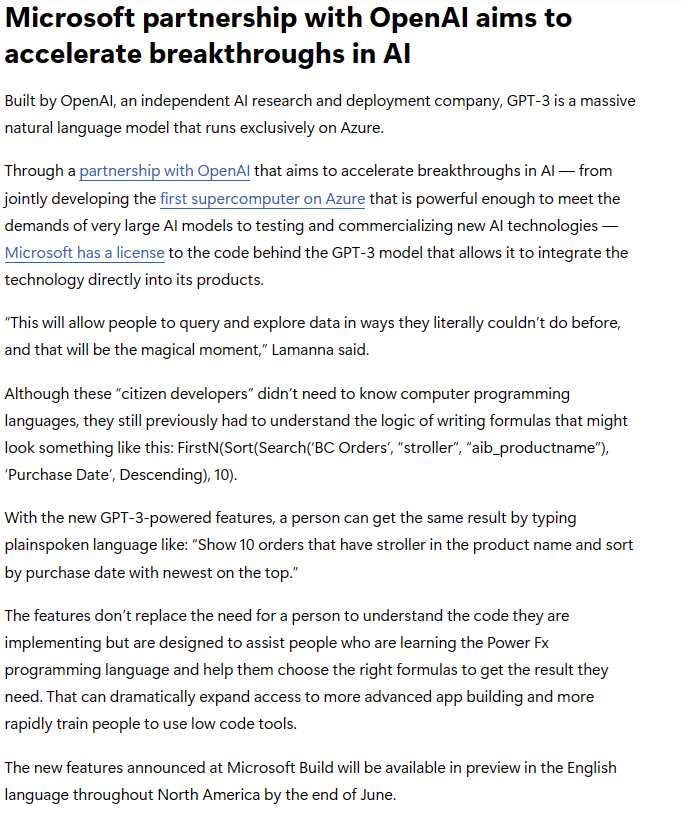

In [8]:
Image(filename=imagefile)

## 2. Extract text using Azure Forms Recognizer

In [9]:
with open(imagefile, "rb") as f:
    document = f.read()

client = DocumentAnalysisClient(
    endpoint=azure_doc_endpoint, credential=AzureKeyCredential(azure_doc_key), headers={"x-ms-useragent": "aoai-demos/1.0.0"}
)

result = client.begin_analyze_document("prebuilt-read", document)
content = result.result().content

In [10]:
print("Document content: \n\n", content)

Document content: 

 Microsoft partnership with OpenAl aims to accelerate breakthroughs in Al
Built by OpenAl, an independent Al research and deployment company, GPT-3 is a massive natural language model that runs exclusively on Azure.
Through a partnership with OpenAl that aims to accelerate breakthroughs in Al - from jointly developing the first supercomputer on Azure that is powerful enough to meet the demands of very large Al models to testing and commercializing new Al technologies - Microsoft has a license to the code behind the GPT-3 model that allows it to integrate the technology directly into its products.
"This will allow people to query and explore data in ways they literally couldn't do before, and that will be the magical moment," Lamanna said.
Although these "citizen developers" didn't need to know computer programming languages, they still previously had to understand the logic of writing formulas that might look something like this: FirstN(Sort(Search('BC Orders', "str

## 3. Summarize Text 

In [11]:
prompt = f"""Text: 

             ###
             {content}
             ###
             
             Tasks:
             1. What is the language?
             2. How many words in it?
             3. How many letters and numbers?
             4. How many letters?
             5. How many numbers?
          """

response = openai.Completion.create(
    engine=model,
    prompt=prompt,
    temperature=0,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0.5,
)

print(response["choices"][0]["text"])


Answer: 
1. The language is English.
2. There are approximately 437 words in the text.
3. There are approximately 2,845 letters and numbers in the text.
4. There are approximately 2,619 letters in the text.
5. There are approximately 226 numbers in the text.


In [12]:
prompt = f"""Text: 

             ###
             {content}
             ###
             
             Tasks:
             1. Summarize the above text into 3 short sentences.
             2. Determine the above test topic. 
             3. Extract top 5 key entities that I need to pay attention to.
             
             Answer the above 3 tasks, one at a time.
          """

response = openai.Completion.create(
    engine=model,
    prompt=prompt,
    temperature=0,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0.5,
)

print(response["choices"][0]["text"])


1. Microsoft has partnered with OpenAl to develop GPT-3, a natural language model that runs on Azure; this technology will enable people to query and explore data more easily, and new features powered by GPT-3 will be available in preview by the end of June.
2. The topic of the text is Microsoft's partnership with OpenAl to accelerate breakthroughs in Artificial Intelligence (AI).
3. Key entities that need to be paid attention to are: Microsoft, OpenAl, GPT-3, Azure, Power Fx programming language.


In [13]:
prompt = f"""Text: 

             ###
             {content}
             ###
             
             Tasks:
             1. Summarize the above text into 3 short sentences.
             2. Determine the above test topic. 
             3. Extract top 5 key entities that I need to pay attention to.
             
             Answer the above 3 tasks, one at a time, in French.
          """

response = openai.Completion.create(
    engine=model,
    prompt=prompt,
    temperature=0,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0.5,
)

print(response["choices"][0]["text"])


1. Microsoft a un partenariat avec OpenAl pour accélérer les avancées en Al, GPT-3 est un modèle de langage naturel qui fonctionne exclusivement sur Azure et les nouvelles fonctionnalités alimentées par GPT-3 permettront aux personnes d'accéder à des applications plus avancées et de se former plus rapidement aux outils à code faible.
2. Le sujet du texte est le partenariat entre Microsoft et OpenAl pour accélérer les avancées en Al et l'utilisation de GPT-3 pour faciliter l'accès aux applications plus avancées.
3. Les 5 entités principales sont Microsoft, OpenAl, GPT-3, Power Fx et North America.


In [14]:
prompt = f"""Text: 

             ###
             {content}
             ###
             
             Tasks:
             1. What are the names of the companies?
             2. Is it about Microsoft. Just say YES or NO.
             3. Is it about Open AI? Explain.
             
             Answer the above 3 tasks, one at a time, in English.
          """

response = openai.Completion.create(
    engine=model,
    prompt=prompt,
    temperature=0,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0.5,
)

print(response["choices"][0]["text"])


Answer 1: The companies are Microsoft and OpenAI.
Answer 2: Yes.
Answer 3: Yes, it is about OpenAI. The article discusses how Microsoft has partnered with OpenAI to develop the GPT-3 model, which runs exclusively on Azure, and how this partnership will help accelerate breakthroughs in AI. It also talks about how the new GPT-3-powered features will help people who are learning the Power Fx programming language by providing them with plainspoken language to get the result they need.
